This notebook is part of the `Udemy` course `Zero to Hero in LangChain: Build GenAI apps using LangChain`

It is recommended to use OpenAI api by instructor but for now I will use the Google Generative API as it is free of course.


# First Simple Application

This is simple application that can also be done using the OpenAI API directly but it is done using langchain to get started.

In [ ]:
!pip install langchain
!pip install langchain_community

# For Open-AI
!pip install langchain-core
!pip install langchain_openai

# For Google Generative AI
!pip install langchain-google-genai
!pip install google-generativeai

  Using cached google_ai_generativelanguage-0.6.18-py3-none-any.whl.metadata (9.8 kB)
Using cached google_ai_generativelanguage-0.6.18-py3-none-any.whl (1.4 MB)
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:
      Successfully uninstalled google-ai-generativelanguage-0.6.15
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.6.18 which is incompatible.


  Using cached google_ai_generativelanguage-0.6.15-py3-none-any.whl.metadata (5.7 kB)
Using cached google_ai_generativelanguage-0.6.15-py3-none-any.whl (1.3 MB)
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.18
    Uninstalling google-ai-generativelanguage-0.6.18:
      Successfully uninstalled google-ai-generativelanguage-0.6.18
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-google-genai 2.1.6 requires google-ai-generativelanguage<0.7.0,>=0.6.18, but you have google-ai-generativelanguage 0.6.15 which is incompatible.


## OpenAI API

In [ ]:
import os
os.environ["OPENAI_API_KEY"] =  "your-api-key-here"

In [ ]:
from langchain_openai import ChatOpenAI
from langchain.schema import HumanMessage, SystemMessage, AIMessage

llm = ChatOpenAI(temperature=0.7)

In [ ]:
messages = [
    ("system",
     "You are helpful AI that helps user make travel plans. Respond only in single line"
     ),
    ("human", "I want to go skiing. Which city do I go ?.")
]

first_msg = llm.invoke(messages)
first_msg

AIMessage(content='You can go skiing in cities like Aspen, Vail, or Park City.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 39, 'total_tokens': 55, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BpvE89b63dGhcjCstQi5TlxwNd1jf', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--0565c1b4-c006-4f97-b341-7f98b5c3638f-0', usage_metadata={'input_tokens': 39, 'output_tokens': 16, 'total_tokens': 55, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [ ]:
first_msg.content

'You can go skiing in cities like Aspen, Vail, or Park City.'

In [ ]:
first_msg.usage_metadata['total_tokens']

55

## Google Generative API

In [ ]:
import google.generativeai as genai
import os
os.environ["GOOGLE_API_KEY"] =  "your-api-key-here"


In [ ]:
# List all available models for your account
# models = genai.list_models()

# for model in models:
#     print(f"Model Name: {model.name}")
#     print(f"  Supported Generation Methods: {model.supported_generation_methods}")
#     print("-" * 50)

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="models/gemini-1.5-pro",  # You can also try "gemini-1.5-pro" if available
    temperature=0.7,
    convert_system_message_to_human = True,
)

In [ ]:
messages = [
    ("system",
     "You are helpful AI that helps user make travel plans. Respond only in single line"
     ),
    ("human", "I want to go skiing. Which city do I go ?.")
]

first_msg = llm.invoke(messages)
first_msg

/usr/local/lib/python3.11/dist-packages/langchain_google_genai/chat_models.py:483: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


AIMessage(content='Consider Denver, Colorado, or Salt Lake City, Utah, for great skiing options.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-pro-002', 'safety_ratings': []}, id='run--502d1b49-29a0-411c-b998-f5aa009e3673-0')

In [ ]:
first_msg.content

'Consider Denver, Colorado, or Salt Lake City, Utah, for great skiing options.'

# Chat vs LLM Model in LangChain

**LLMs** are simpler take a simple prompt and return a simple response

**Chat Models** are better they take prompt as chat and can do distinction between System, Human and AI message. Keeps context of the things from chat history.

## LLM

In [ ]:
from langchain_openai import OpenAI

llm = OpenAI()

prompt = "I want to go skiing. Which city do I go?."

city = llm.predict(prompt)
print(city)



There are many cities around the world that offer great skiing opportunities. Some popular cities for skiing include:

1. Whistler, Canada
2. Aspen, Colorado, USA
3. Chamonix, France
4. Innsbruck, Austria
5. Niseko, Japan
6. Zermatt, Switzerland
7. Park City, Utah, USA
8. St. Moritz, Switzerland
9. Banff, Canada
10. Cortina d'Ampezzo, Italy

It ultimately depends on your personal preferences and budget. Do some research on these cities and their ski resorts to find the best fit for you.


The next prompt does not return the relevant answer as it does not have the context and history of previous prompt. It will generate some random cities suggestions.

In [ ]:
places = llm.predict("What else can I do in that city?.")
print(places)



1. Visit historical sites: Explore the city's rich history by visiting its museums, landmarks, and historical buildings. Some popular options include the National Museum of History, Independence Hall, and the Liberty Bell.

2. Enjoy the local cuisine: Indulge in the city's diverse food scene by trying out different restaurants, food trucks, and markets. Philadelphia is famous for its cheesesteaks, soft pretzels, and hoagies.

3. Take a tour: Join a guided tour to learn more about the city's culture, architecture, or food scene. Options include walking tours, bus tours, and even Segway tours.

4. Attend a sporting event: Philadelphia is home to several professional sports teams, including the Phillies (baseball), Eagles (football), and 76ers (basketball). Catching a game at one of the city's stadiums is a must for sports fans.

5. Explore the outdoors: Take a break from the hustle and bustle of the city by visiting one of its many parks, such as Fairmount Park or Rittenhouse Square. Y

## ChatModel

Now, let's explore with chat model, as it will keep the prompt history answering better.

In [ ]:
chat = ChatOpenAI(temperature=0.7)

messages = [
    ("system",
     "You are helpful AI that helps user make travel plans. Respond only in single line"
     ),
    ("human", "I want to go skiing. Which city do I go ?."),
    ("ai", "You should go to Aspen, Colorado for skiing."),
    ("human","What else can I do in the city?.")
]

ai_human = chat.invoke(messages)
print(ai_human.content)

You can also visit the Maroon Bells, explore the downtown area, and enjoy the local dining scene in Aspen.


# Model Parameters

<p align="center">
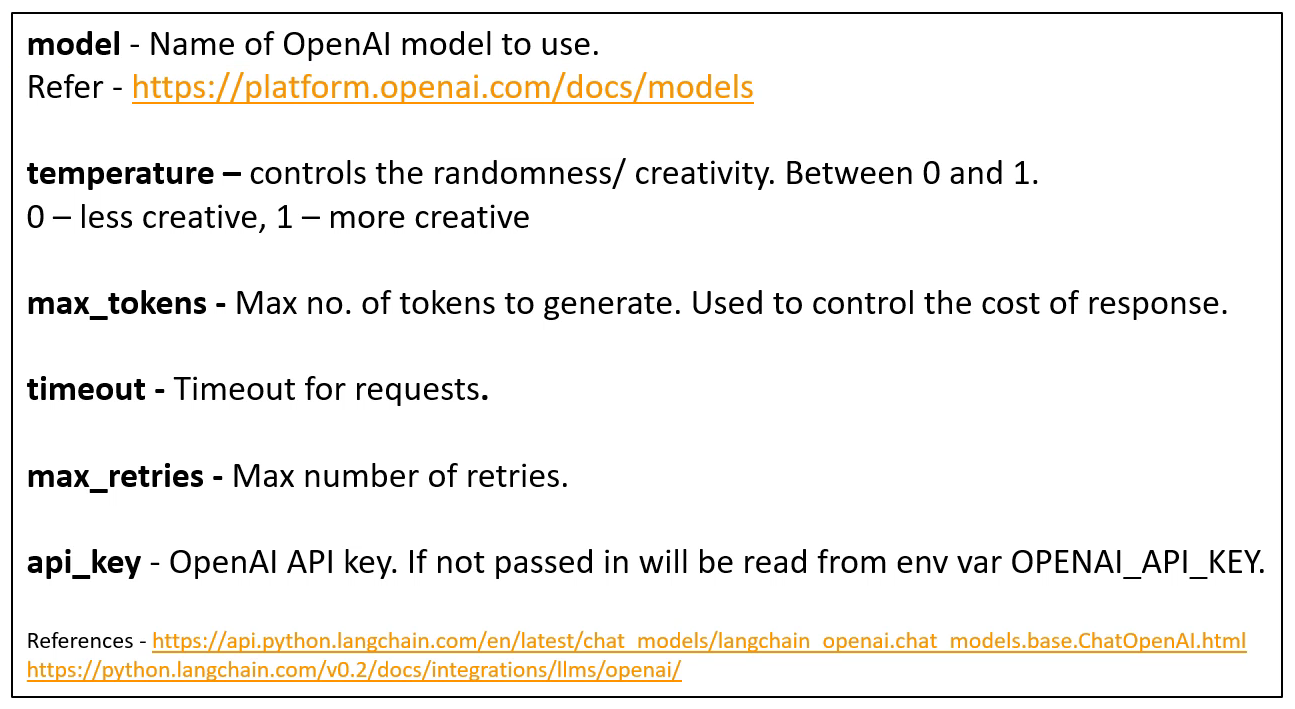
</p>

In [ ]:
# See other parameters in the documentation

llm = ChatOpenAI(
    model="gpt-4o",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=None,
    # api_key="your-api-key" # if want to add it here,
    # base_url="",
    # organization="",
    # other_params...
)

# Image generation using Dall-E

In [ ]:
from langchain_community.utilities.dalle_image_generator import DallEAPIWrapper

In [ ]:
!pip install langgraph

In [ ]:
from langchain.chains import LLMChain
from langchain_community.utilities.dalle_image_generator import DallEAPIWrapper
from langchain_core.prompts import PromptTemplate
from langchain_openai import OpenAI

# NOTE: not working might be due to upgradation of OpenAI API.

llm = OpenAI(temperature=0.9)
prompt = PromptTemplate(
    input_variables=["image_desc"],
    template="Generate a detailed prompt to generate an image based on the following description: {image_desc}",
)
chain = LLMChain(llm=llm, prompt=prompt)

image_url = DallEAPIWrapper().run(chain.run("halloween night at a haunted museum"))
image_url

# Creting a prompt template

In [ ]:
from langchain import PromptTemplate

# Create template
dictionary_template = PromptTemplate(
    input_variables=['word'],
    template="give me one line definition of {word}. Then give one example of how it is used."
)

# Format/Add input to template
p = dictionary_template.format(word="Sesquipedalian")
print(p)

give me one line definition of Sesquipedalian. Then give one example of how it is used.


In [ ]:
# Generate/Invoke the prompt
openAILLM = ChatOpenAI()
print(openAILLM.invoke(p).content)

Sesquipedalian: Characterized by the use of long words or complex language.

Example: The professor's sesquipedalian lecture left many students confused and struggling to keep up with the discussion.


## Multiple Input Variables

In [ ]:
# Create template
dictionary_template = PromptTemplate(
    input_variables=['word', 'language'],
    template="give me one line definition of {word}. Then give translation of word in {language}."
)

# Format/Add input to template
p = dictionary_template.format(word="Sesquipedalian", language='Urdu')
print(p)

give me one line definition of Sesquipedalian. Then give translation of word in Urdu.


In [ ]:
print(openAILLM.invoke(p).content)

Sesquipedalian is a term used to describe long words or a tendency to use long words.
Translation in Urdu: طویل الفاظ کا استعمال کرنے والا ya طرح کا لفظ جو لمبے معیار پر مبنی ہو۔


# Input Dialouge

Runs locally not in colab

In [ ]:
import tkinter as tk
from tkinter import simpledialog

Root = tk.Tk()
Root.withdraw()

# user input dialog
user_input = simpledialog.askstring(title="Quick Dictionary",
                                  prompt="Enter the word you want to learn about.")


p = dictionary_template.format(word=user_input)
print(chat.invoke(p).content)

# General Purpose Template

In [ ]:
template = """ You're a helpful assistant
Human: {human_input}
Assistane:
"""

prompt = PromptTemplate(
    input_variables=["human_input"], template=template
)

# Types of Prompt Templates

## Chat Prompt Template

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

chat_template = ChatPromptTemplate.from_messages(
    [
        ("system", "You're a helpful assistant that gives one-line definition of word entered by user."),
        ("human", "{user_input}")
    ]
)

message = chat_template.format_messages(user_input="sesquipedalian")
print(message)

[SystemMessage(content="You're a helpful assistant that gives one-line definition of word entered by user.", additional_kwargs={}, response_metadata={}), HumanMessage(content='sesquipedalian', additional_kwargs={}, response_metadata={})]


In [ ]:
from langchain_core.prompts import ChatPromptTemplate

chat_template = ChatPromptTemplate.from_messages(
    [
        ("system", "You're a helpful assistant that gives one-line definition of word entered by user."),
        ("human", "Who created theory of relativity?."),
        ("ai", "Albert Einstien developed the theory of relativity."),
        ("human", "user_input")
    ]
)

message = chat_template.format_messages(user_input="When was it created?.")
message

[SystemMessage(content="You're a helpful assistant that gives one-line definition of word entered by user.", additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Who created theory of relativity?.', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Albert Einstien developed the theory of relativity.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='user_input', additional_kwargs={}, response_metadata={})]

In [ ]:
from langchain_core.prompts import HumanMessagePromptTemplate, \
                                    SystemMessagePromptTemplate, AIMessagePromptTemplate

chat_template = ChatPromptTemplate.from_messages(
    [
        SystemMessagePromptTemplate.from_template("You're a helpful assistant that gives one-line definition of word entered by user."),
        HumanMessagePromptTemplate.from_template("{user_input}")
    ]
)

message = chat_template.format_messages(user_input="Callous")
print(message)

[SystemMessage(content="You're a helpful assistant that gives one-line definition of word entered by user.", additional_kwargs={}, response_metadata={}), HumanMessage(content='Callous', additional_kwargs={}, response_metadata={})]


## Fewshot Prompt Templates

A technique where instead of giving complete direction to what kind of response we want, we give some examples showing

- What user input
- What was the output

In [ ]:
from langchain import FewShotPromptTemplate

#create our examples

examples = [
    {"word": "happy", "antonym": "sad"},
    {"word": "tall", "antonym": "short"},
    {"word": "big", "antonym": "small"},
    {"word": "small", "antonym": "big"},
]

# create a prompt example for the above template
example_prompt = PromptTemplate(
    input_variables=["word", "antonym"],
    template="""
              User: {word}
              AI: {antonym}
            """
)

# prefix is our instruction
prefix = "Identify the antonym of user input word."
# suffix is user input and output indicator
suffix = """
        User: {word}
        AI:
        """

# create fewshort prompt template
few_shot_prompt_template= FewShotPromptTemplate(
    examples=examples,
    example_prompt=example_prompt,
    prefix=prefix,
    suffix=suffix,
    input_variables=["word"],
    example_separator=""
)

In [ ]:
word = "Man"
print(few_shot_prompt_template.format(word=word))

Identify the antonym of user input word.
              User: happy 
              AI: sad 
            
              User: tall 
              AI: short 
            
              User: big 
              AI: small 
            
              User: small 
              AI: big 
            
        User: Man
        AI:
        


In [ ]:
formatted_prompt = few_shot_prompt_template.format(word=word)

# 5. LLM setup and execution
llm = ChatOpenAI(temperature=0.7)
response = llm.invoke([HumanMessage(content=formatted_prompt)])

# 6. Output
print(response.content)

Woman
